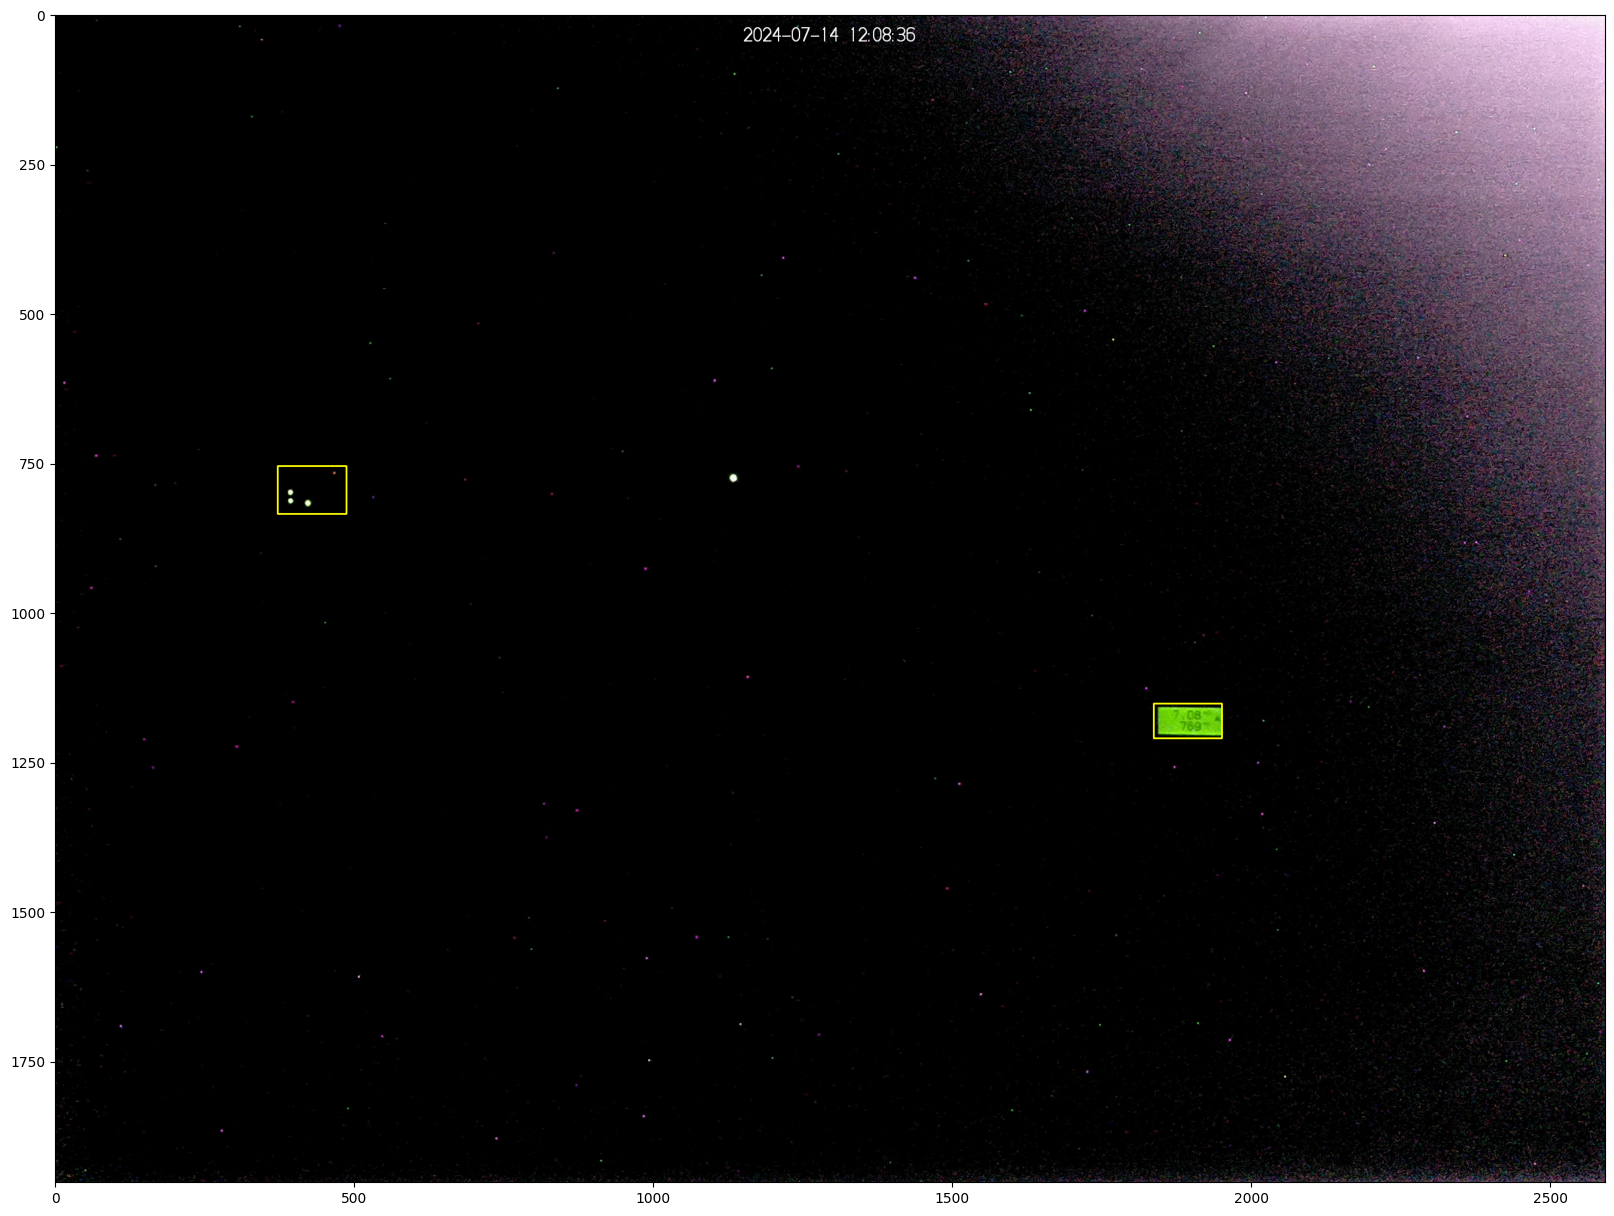

In [25]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import yaml
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import math

def draw_rectangle(image, rectangle_origin, rectangle_size):
    color = (0, 255, 255) 
    thickness = 2

    start_point = (rectangle_origin[0], rectangle_origin[1])
    end_point = (rectangle_origin[0] + rectangle_size[0], rectangle_origin[1] + rectangle_size[1])

    return cv2.rectangle(image, start_point, end_point, color, thickness)

with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

#print(config)

#image = cv2.imread("samples/normal_s3_7.08_769.jpg")
image = cv2.imread("samples/full_s2_7.16_790.jpg")
image = draw_rectangle(image, config["leds"]["rectangle_origin"], config["leds"]["rectangle_size"])
image = draw_rectangle(image, config["lcd"]["rectangle_origin"], config["lcd"]["rectangle_size"])

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


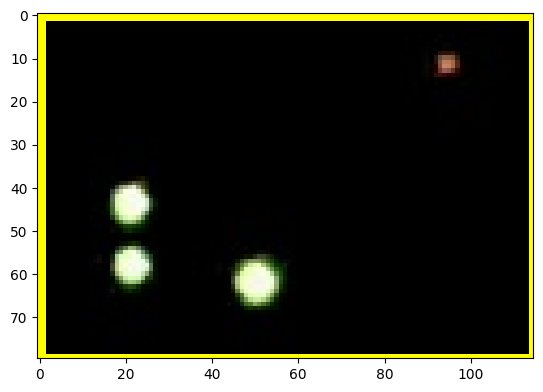

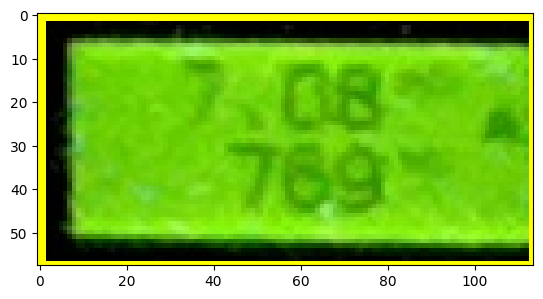

In [26]:
def crop_rectangle(image, rectangle_origin, rectangle_size):

    return image[rectangle_origin[1]:rectangle_origin[1]+rectangle_size[1], rectangle_origin[0]:rectangle_origin[0]+rectangle_size[0]]

leds = crop_rectangle(image, config["leds"]["rectangle_origin"], config["leds"]["rectangle_size"])
lcd = crop_rectangle(image, config["lcd"]["rectangle_origin"], config["lcd"]["rectangle_size"])

#plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(leds, cv2.COLOR_BGR2RGB))
plt.show()

#plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(lcd, cv2.COLOR_BGR2RGB))
plt.show()

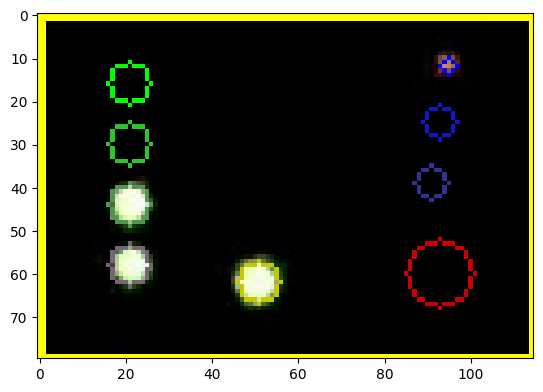

K1: on
K2: off
K3: off
S1: off
S2: off
S3: on
S4: on
Status: on
Black: on


In [27]:
def annotate_led(img, origin, radius, color):
    leds_visual = img.copy()    
    cv2.circle(leds_visual, (origin[0], origin[1]), radius, color, 1)
    return leds_visual

def get_led_color(img, origin, radius):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask_empty_indicator = np.zeros_like(gray)
    cv2.circle(mask_empty_indicator, (origin[0], origin[1]), radius, 255, -1)

    return cv2.mean(img, mask=mask_empty_indicator)[:3]
    #print("avg_empty_indicator:", avg_empty_indicator)
    #box = np.zeros((10,10,3), np.uint8)
    #cv2.rectangle(box,(0,0),(10,10),(avg_empty_indicator),-1)
    #plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
    #plt.show()


leds_dict = { 
    "K1": (255, 0, 0), 
    "K2": (200, 20, 20), 
    "K3": (150, 50, 50),
    "S1": (0, 255, 0 ),
    "S2": (40, 200, 40 ),
    "S3": (80, 150, 80 ),
    "S4": (120, 100, 120 ),
    "Status": (0, 200, 200 ),
    "Black": (0, 0, 200)
    }

annotated_leds = leds.copy()
led_colors = {}

for led in leds_dict:
    annotated_leds = annotate_led(annotated_leds, config["leds"][led]["origin"], config["leds"][led]["radius"], leds_dict[led])
    led_colors[led] = get_led_color(leds, config["leds"][led]["origin"], config["leds"][led]["radius"])

plt.imshow(cv2.cvtColor(annotated_leds, cv2.COLOR_BGR2RGB))
plt.show()

for color in led_colors:
    euclidian_distance = math.dist(led_colors[color], tuple(config["leds"][color]["color"]))
    status = "off"
    if euclidian_distance < 100: 
        status = "on"
    print(f"{color}: {status}")


#view_led(leds, config["leds"]["K1"]["origin"], config["leds"]["K1"]["radius"])
#get_led_color(leds, config["leds"]["K1"]["origin"], config["leds"]["K1"]["radius"])

#view_led(leds, config["leds"]["S4"]["origin"], config["leds"]["S4"]["radius"])
#get_led_color(leds, config["leds"]["S4"]["origin"], config["leds"]["S4"]["radius"])
